### Stochastic process, Time Series, Stationarity, Autocorrelation

* autocovariance function: 
\begin{align}
\gamma_x(s,t)&=cov(x_s,x_t)=E[(x_s-\mu_s)(x_t-\mu_t)]\forall s,t \tag{1}\\
\gamma_x(s,t)&=\gamma_x(t,s)\tag{a}\\
\gamma_x(s,s)&=cov(x_s,x_s)=E[(x_s-\mu_s)^2]\tag{b}
\end{align}
* autocorrelation function: when $k=0$ and $\rho_0=1$
$$\rho_k=\frac{\gamma_k}{\sigma^2}\tag{2}$$
* Sample ACF: $$\frac{\hat{\gamma}_k}{\hat{\gamma}_0}=\frac{\frac{1}{T}\sum^{T-K}_{t=1}(x_t-\bar{x})(x_{t+k}-\bar{x})}{\frac{1}{T}\sum^T_{t=1}(x_t-\bar{x})^2}\tag{3}$$

In [1]:
from __future__ import absolute_import, division, print_function

import sys
import os
import wget

import numpy as np
import pandas as pd
import fix_yahoo_finance as web

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# seaborn plotting style
sns.set(style='ticks', context='poster')

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
wget.download(url='https://raw.githubusercontent.com/NeelkanthMehta/MSFE_660/module_05/fredexport.csv', 
              out='/Users/apple/Downloads/variables.csv')

'/Users/apple/Downloads/variables (1).csv'

In [5]:
variables = pd.read_csv(filepath_or_buffer='/Users/apple/Downloads/variables.csv', index_col=0)
variables.index = pd.to_datetime(arg=variables.index, errors='coerce')

In [6]:
variables = variables['1980':'2018-10']
variables = variables.convert_objects(convert_numeric=True)
variables.interpolate(inplace=True, method='polynomial', order=2)
print(variables.head())
print('='*80)
variables.info()

               CPI  exchange_rate  gsec_int_rates  t_int_rates  LTg_yields  \
DATE                                                                         
1980-01-01 0.00000        0.82000         0.09000      0.04000     0.09000   
1980-02-01 0.99000        0.81000         0.09000      0.04000     0.09000   
1980-03-01 0.98000        0.81000         0.09000      0.04000     0.09000   
1980-04-01 0.97000        0.81000         0.09000      0.04000     0.09000   
1980-05-01 0.96000        0.79000         0.10000      0.05000     0.10000   

                M0      M1       M2       M3  total_reserves   Ex_Im  
DATE                                                                  
1980-01-01 2.11000 6.21000 17.14000 28.31000         0.67000 1.62000  
1980-02-01 2.18000 6.35000 17.22000 28.52000         0.97000 1.84000  
1980-03-01 2.22000 7.06000 17.84000 29.43000         0.65000 1.69000  
1980-04-01 2.66000 6.57000 17.63000 29.36000         0.68000 1.30000  
1980-05-01 2.67000 6.64000 

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [7]:
CPI = variables['CPI']
FX = variables['exchange_rate']
LTY = variables['LTg_yields']

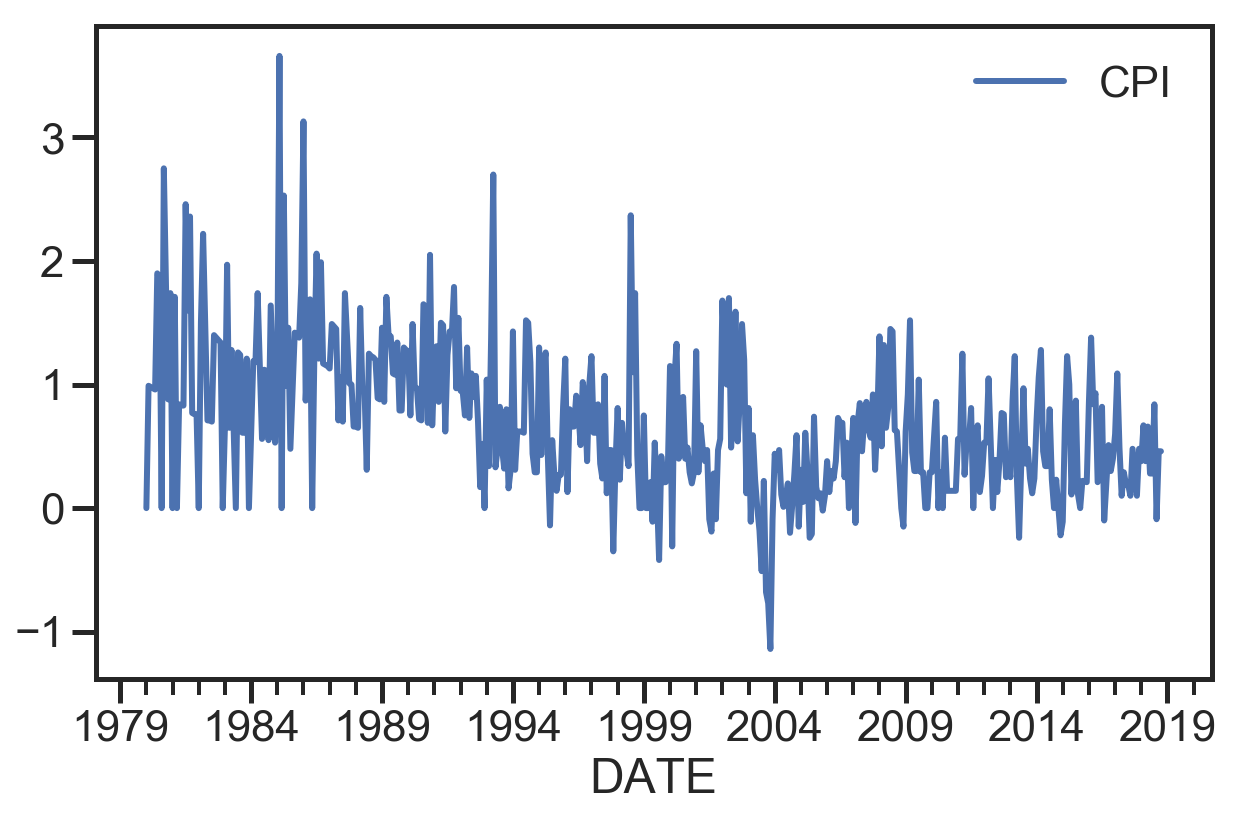

In [8]:
CPI.plot(figsize=(10,6))
plt.legend(frameon=False)
plt.show()

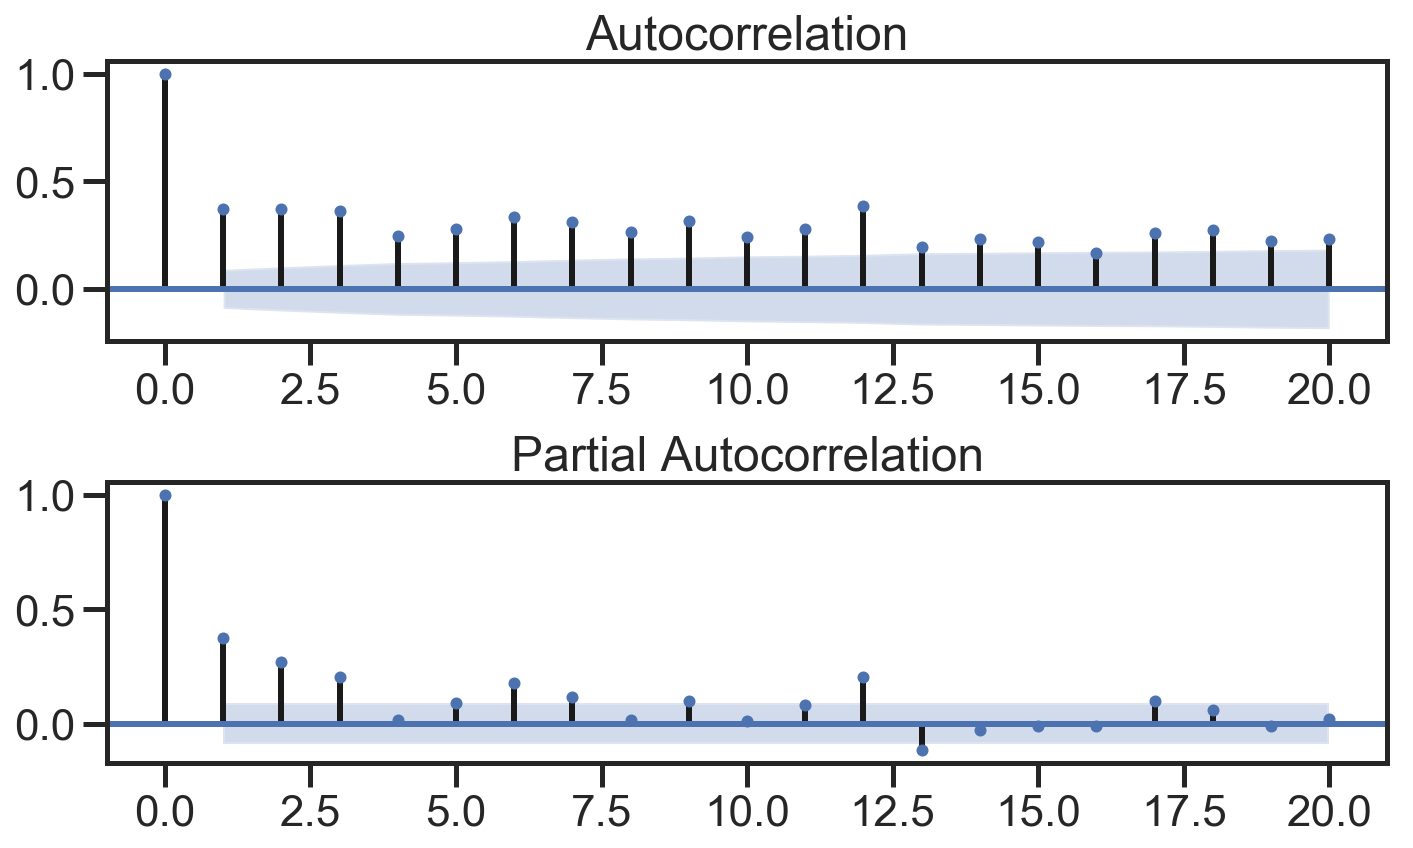

In [9]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,1,1)
fig = sm.graphics.tsa.plot_acf(x=CPI, lags=20, ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(2,1,2)
fig = sm.graphics.tsa.plot_pacf(x=CPI, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

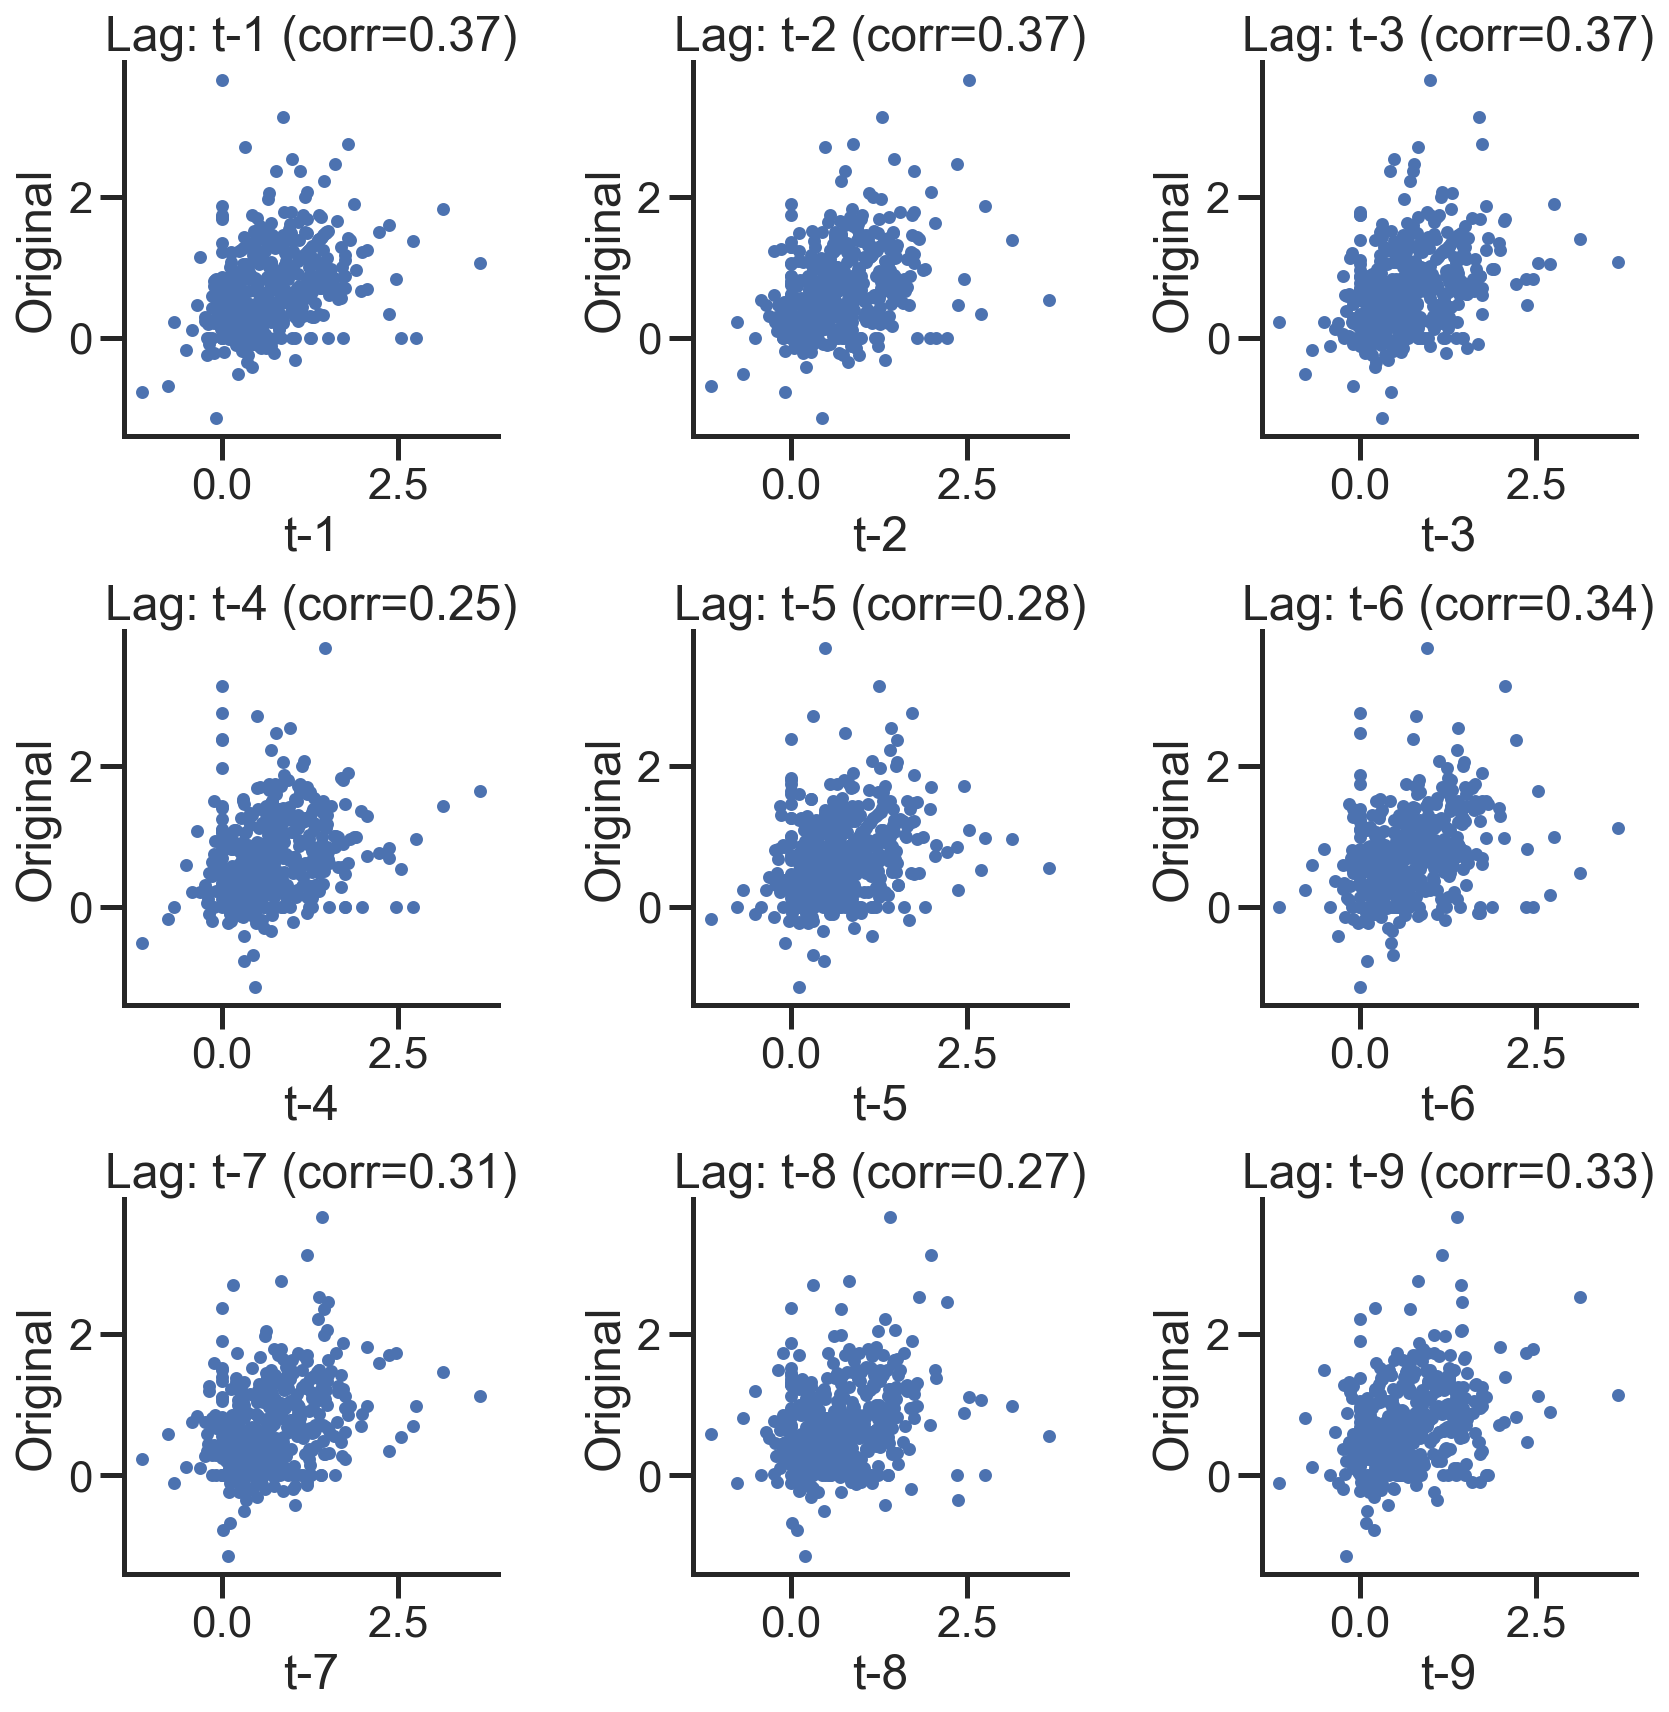

In [10]:
# Scatterplot matrix is another way to visualize the autocorrelation
# Its advantage is that it is very intuitive, as scatterplot (i.e. one of the plots in a scatterplot matrix) 
# is used often in practice

lags=9

ncols=3
nrows=int(np.ceil(lags/ncols))

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows))

for ax, lag in zip(axes.flat, np.arange(1,lags+1, 1)):
    lag_str = 't-{}'.format(lag)
    X = (pd.concat([CPI, CPI.shift(-lag)], axis=1,
                   keys=['y'] + [lag_str]).dropna())

    X.plot(ax=ax, kind='scatter', y='y', x=lag_str);
    corr = X.corr().as_matrix()[0][1]
    ax.set_ylabel('Original')
    ax.set_title('Lag: {} (corr={:.2f})'.format(lag_str, corr));
    ax.set_aspect('equal');
    sns.despine();

fig.tight_layout();

In [11]:
# Or, we can plot the four essential plots all at once:

def tsplot(y, lags=None, title='', figsize=(14, 8)):
    '''Examine the patterns of ACF and PACF, along with the time series plot and histogram.
    
    Original source: https://tomaugspurger.github.io/modern-7-timeseries.html
    '''
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    kde_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot.kde(ax=kde_ax)
    kde_ax.set_title('distribution')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

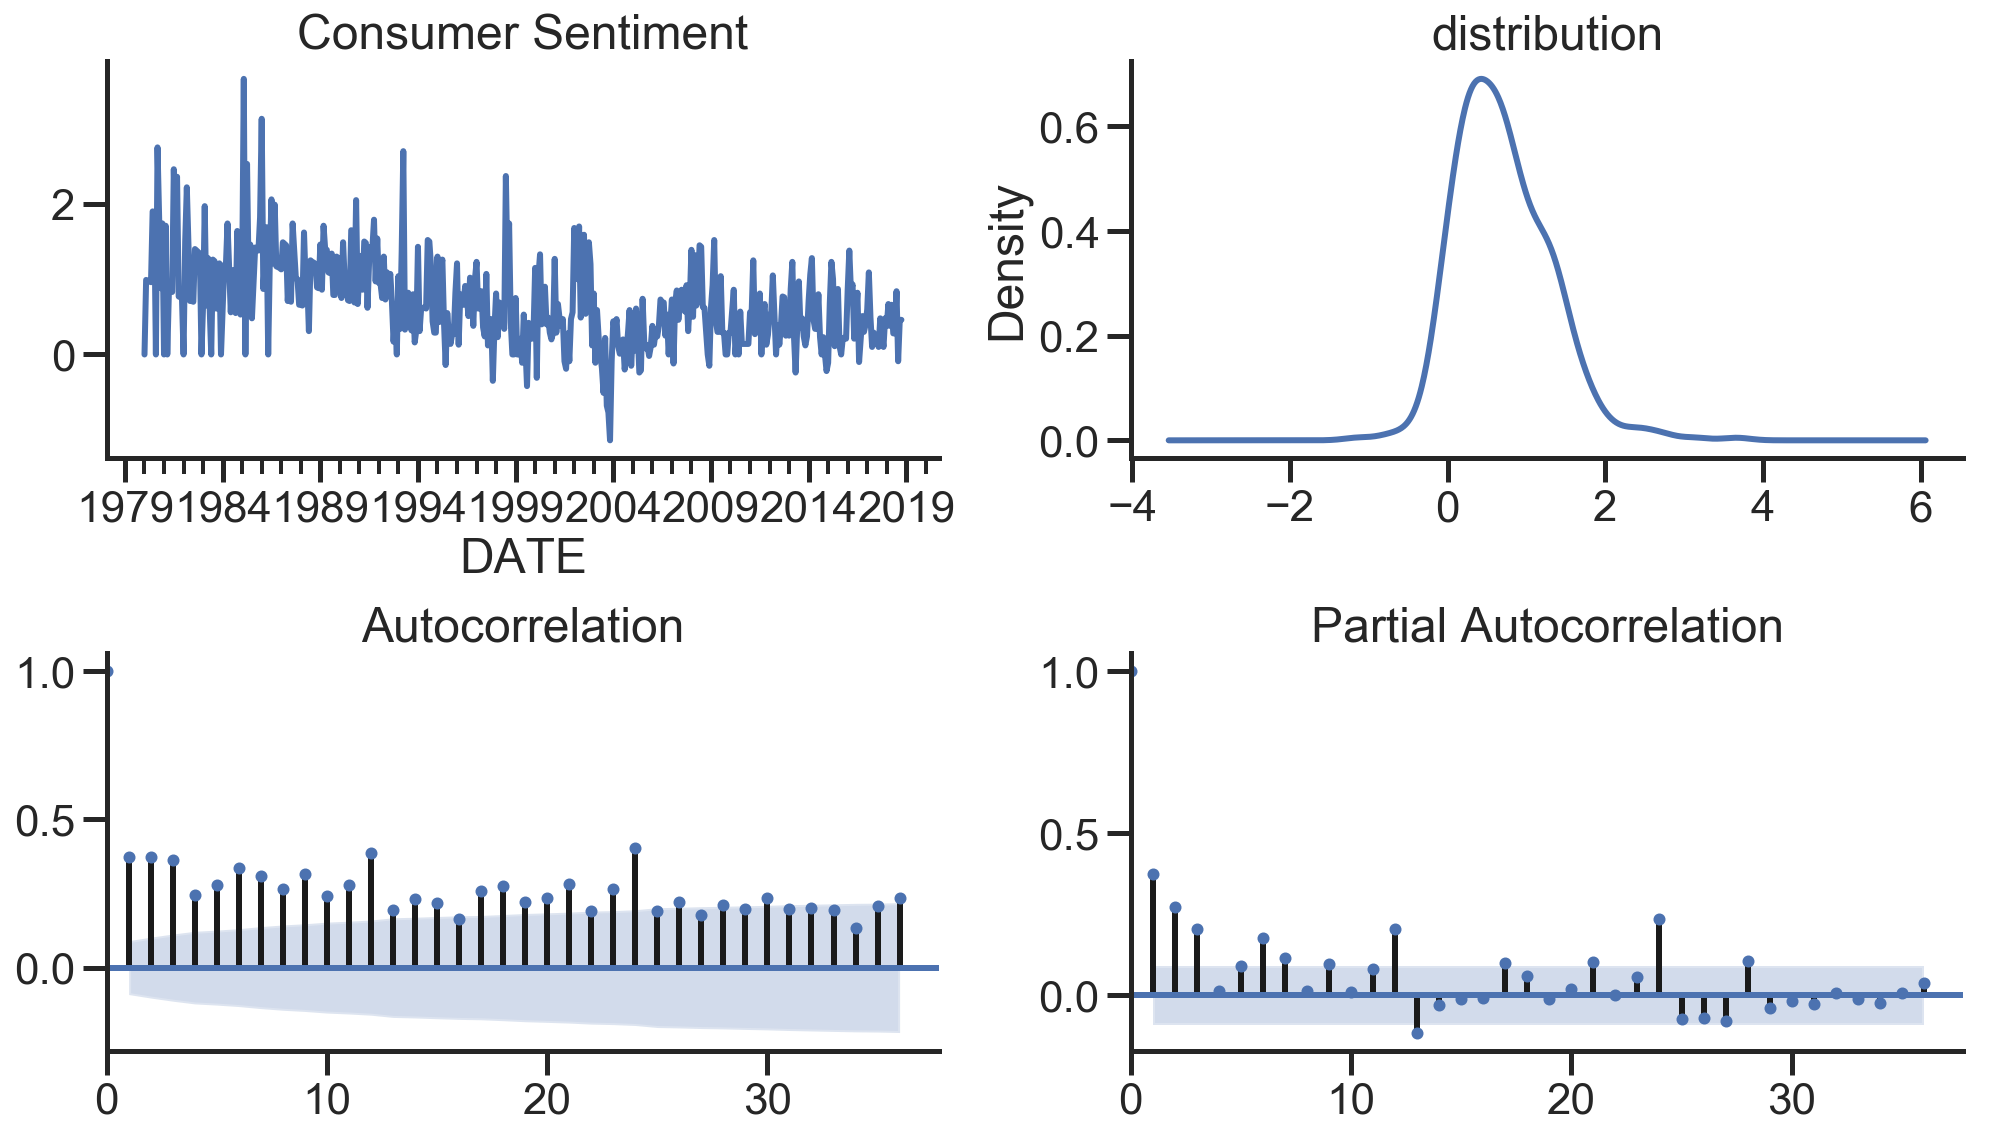

In [31]:
tsplot(CPI, title='Consumer Sentiment', lags=36);

1. Dtermine the degree of p
2. Study the patters of ACF and PACF of the appropriately differenciated series: $\omega_t=(1-B)^d_z$, as these autocorrelation functions will provide indication for choice of order of autoregressive and moving average components.
3. The following table summarize the patterns of ACF and PACF associated with **AR(p)**, **MA(q)**, **ARMA(p,q)**

|Process|ACF|PACF|
|---|---|---|
|AR(p)|tails off|cut off after lag *p*|
|MA(q)|cut off after lag *q*|tails off|
|ARMA(p,q)|tails off|tails off|

4. In general, ACF of an autoregressive process is similar to PACF of a moving average process, and vice versa
5. These are theoretical properties. in practice, the estimated ssample of ACf and PACF can come with large variances , deviating from underlying theoratical behavior. As such, it is prudent to recognize that these are but broad characteristics, and it is quite possible that several candidate models are narrowed down and will need to be investigated further in the later stage of the modelling process

In [12]:
X_train = CPI[:np.floor(len(CPI.index) * 0.9).astype(np.int)]
X_test = CPI[np.floor(len(CPI.index) * 0.9).astype(np.int):]

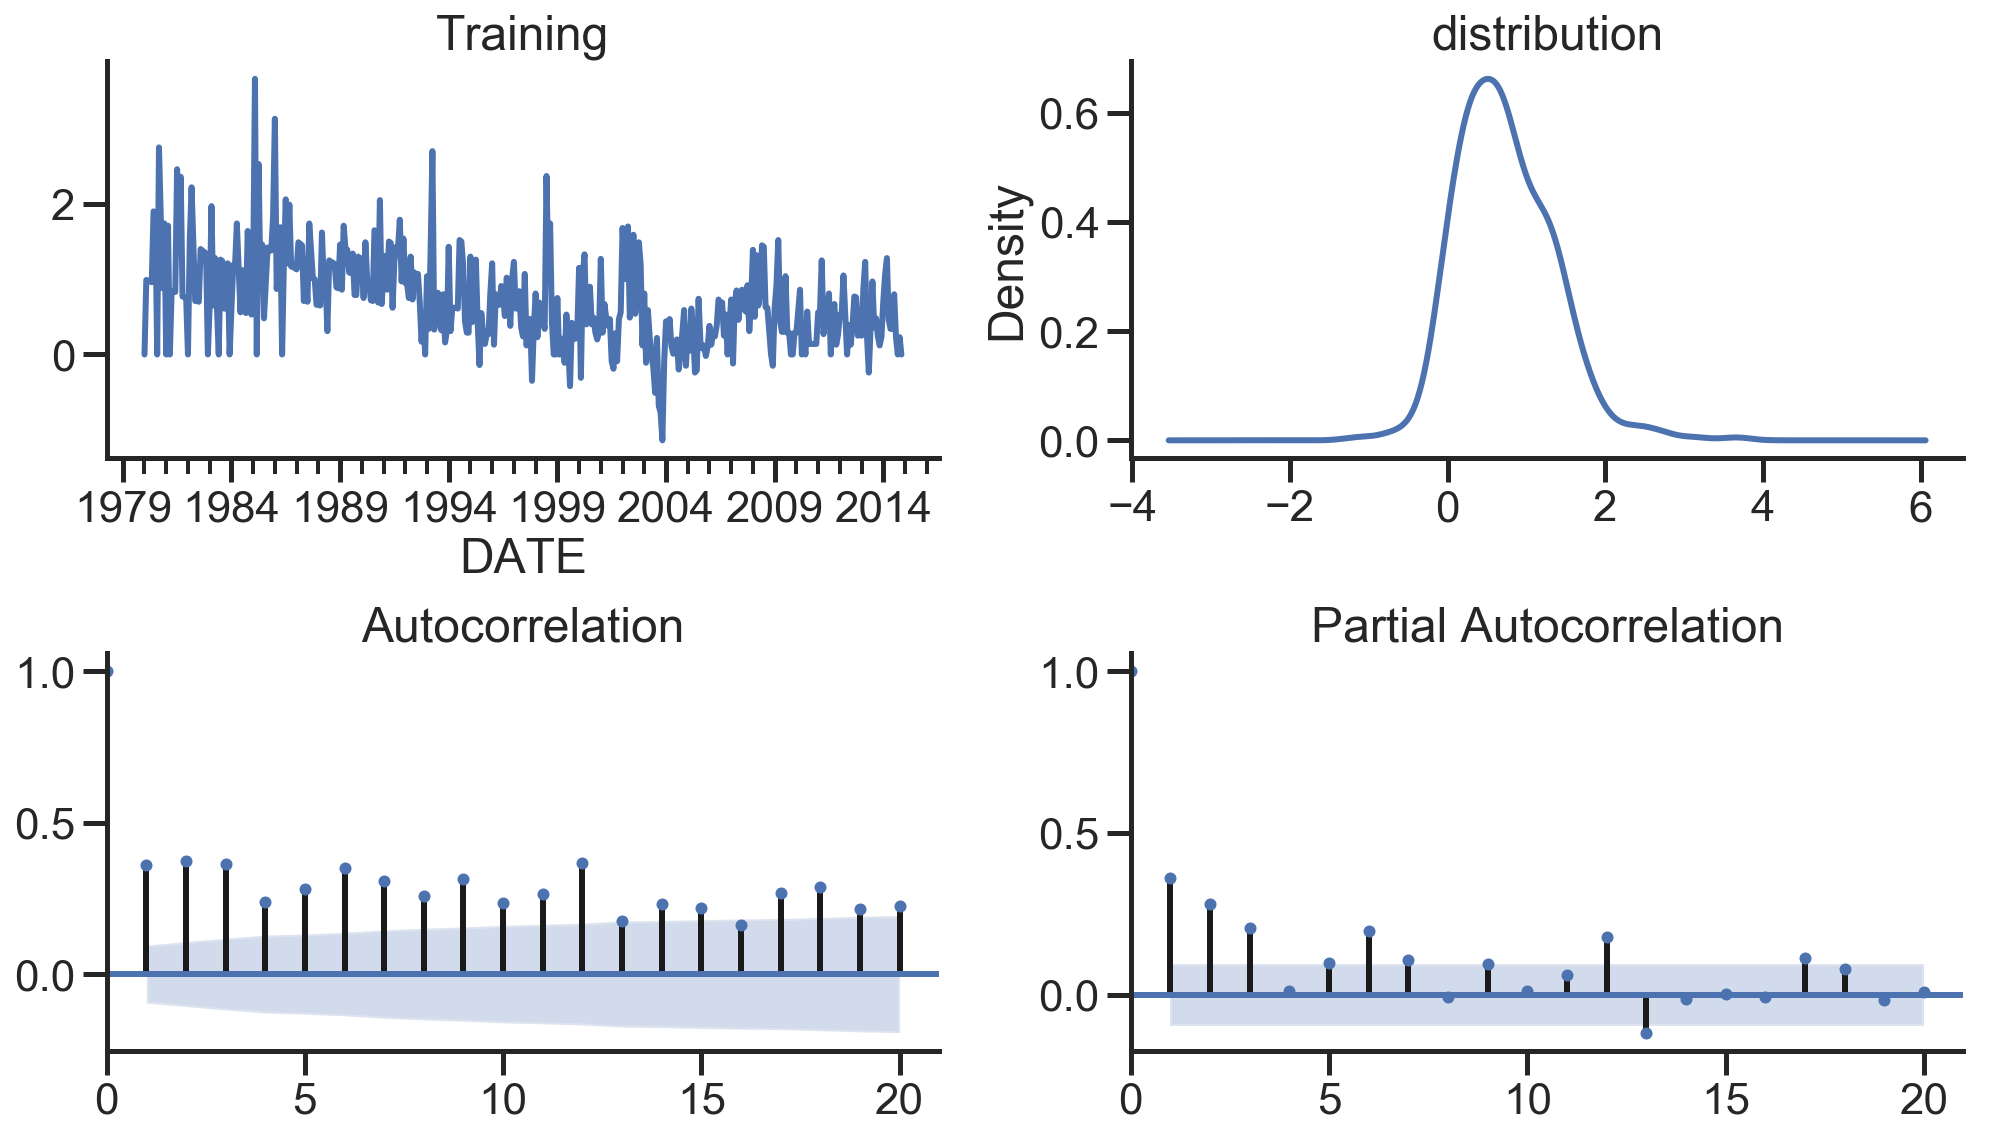

In [13]:
tsplot(y=X_train, lags=20, title='Training');

In [14]:
arima = sm.tsa.SARIMAX(endog=X_train, order=(0,1,1))
model_results = arima.fit()
model_results.summary()

/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                    CPI   No. Observations:                  419
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -326.043
Date:                Sun, 03 Feb 2019   AIC                            656.086
Time:                        20:26:32   BIC                            664.157
Sample:                    01-01-1980   HQIC                           659.277
                         - 11-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8934      0.020    -43.590      0.000      -0.934      -0.853
sigma2         0.2776      0.013     20.970      0.000       0.252       0.304
===================================================================================
Ljung-Box (Q):                      105.89   Jarque-Bera (JB):               120.99
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

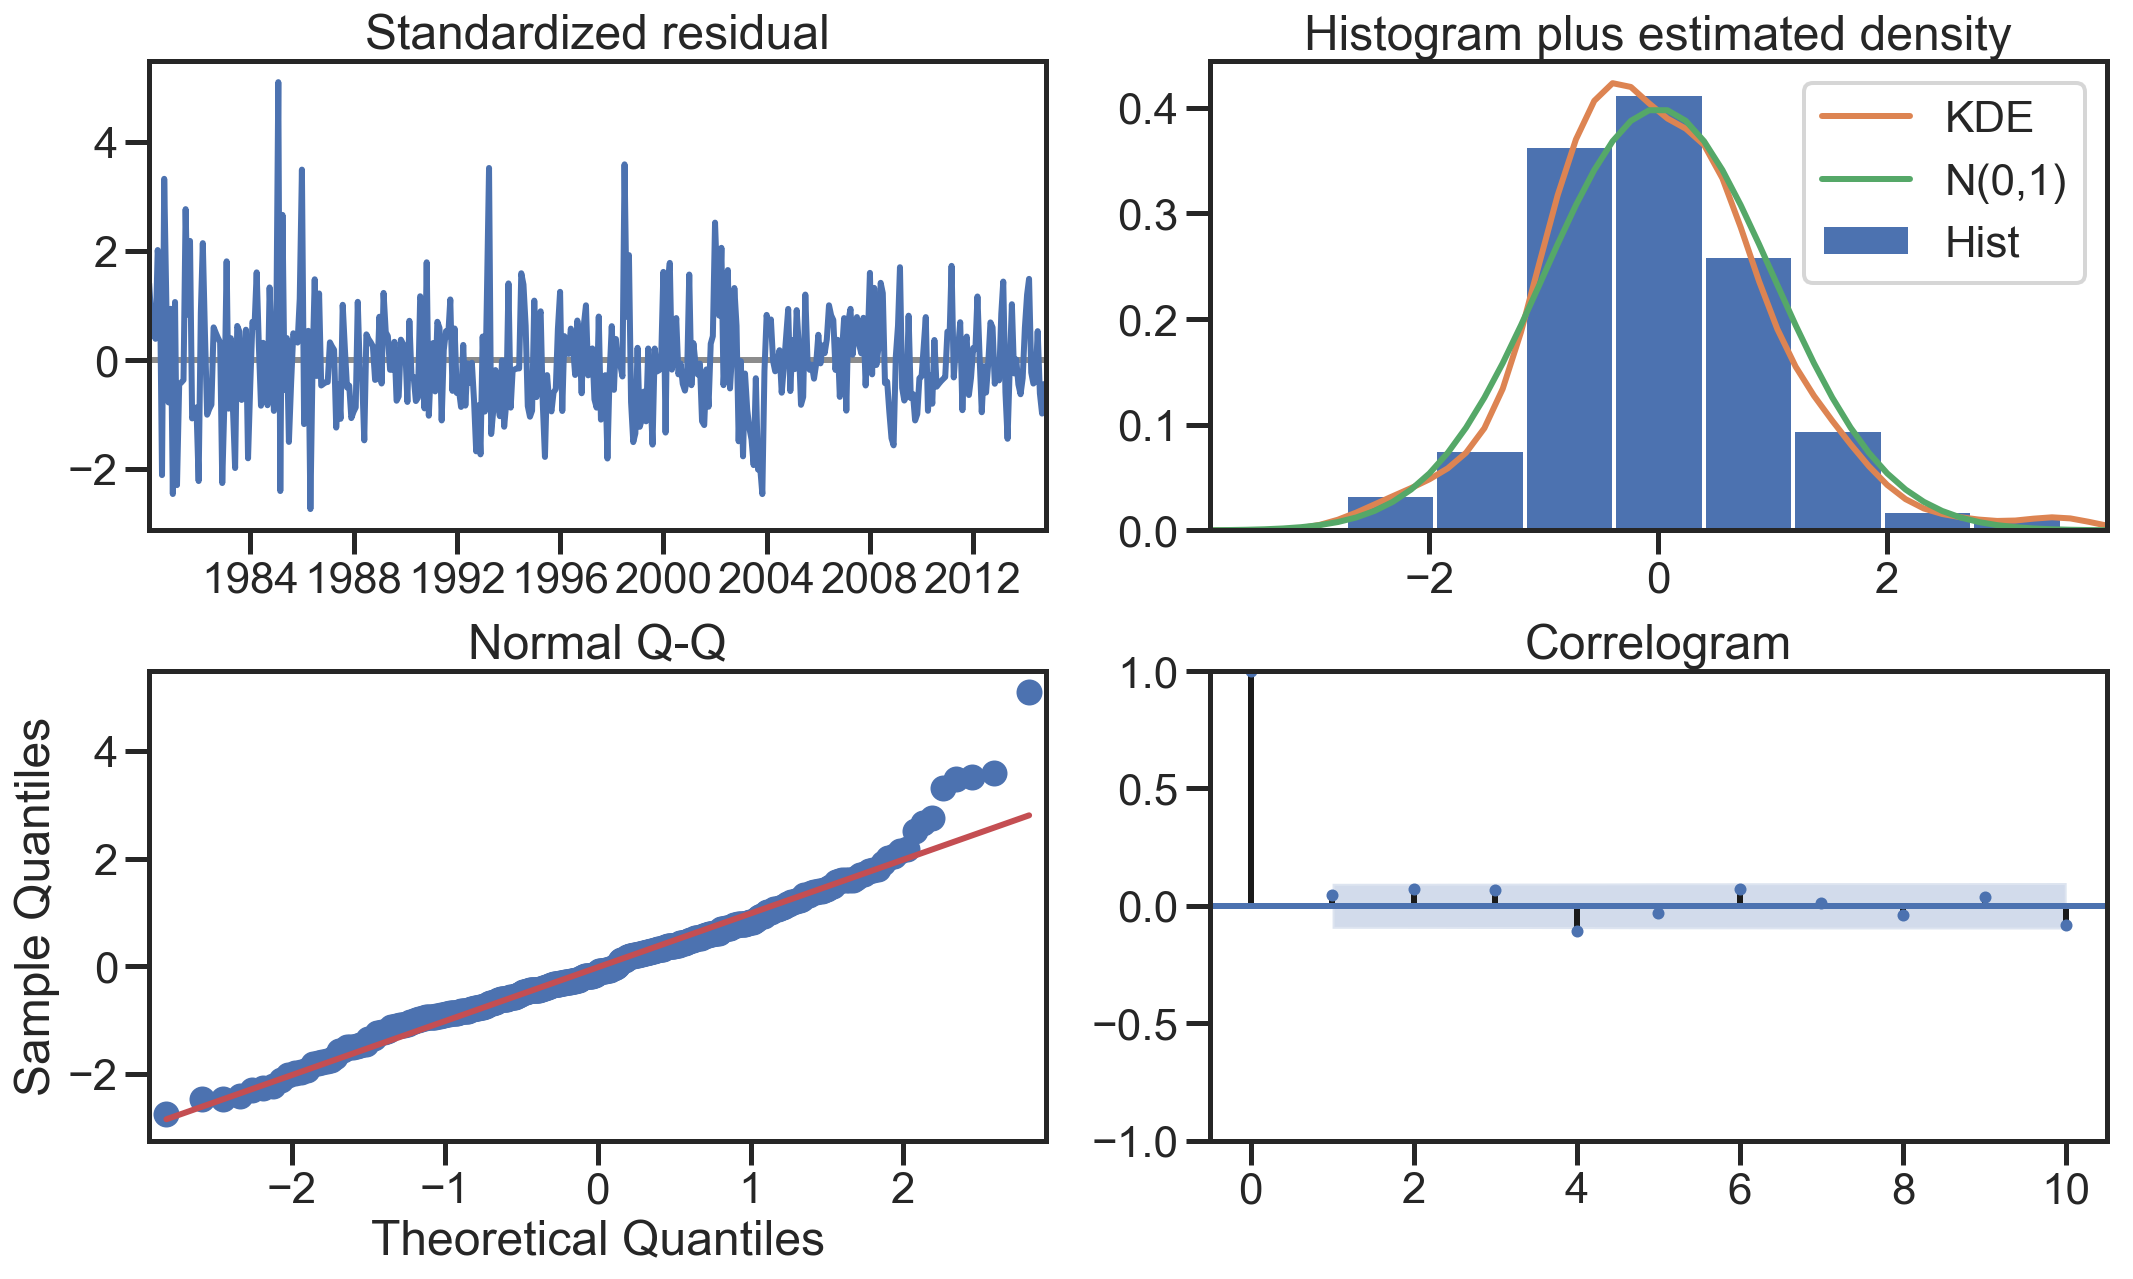

In [15]:
model_results.plot_diagnostics(figsize=(15,9),);
plt.tight_layout()
plt.show()

In [34]:
import itertools

p_min = 0
d_min = 0
q_min = 0
p_max = 5
d_max = 2
q_max = 5

# Initialize a DataFrame to store the results
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])

for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
    
    try:
        model = sm.tsa.SARIMAX(ts_train, order=(p, d, q),
#                                enforce_stationarity=True,
#                                enforce_invertibility=True,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)

In [35]:
results_bic

,MA0,MA1,MA2,MA3,MA4,MA5
AR0,nan,nan,nan,nan,nan,nan
AR1,nan,nan,nan,nan,nan,nan
AR2,nan,nan,nan,nan,nan,nan
AR3,nan,nan,nan,nan,nan,nan
AR4,nan,nan,nan,nan,nan,nan
AR5,nan,nan,nan,nan,nan,nan


In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(data=results_bic, mask=results_bic.isnull(), ax=ax, annot=True, fmt='.2f');
ax.set_title('BIC');
plt.show()

In [37]:
het_method='breakvar'
norm_method='jarquebera'
sercor_method='ljungbox'

(het_stat, het_p) = model_results.test_heteroskedasticity(het_method)[0]
norm_stat, norm_p, skew, kurtosis = model_results.test_normality(norm_method)[0]
sercor_stat, sercor_p = model_results.test_serial_correlation(method=sercor_method)[0]
sercor_stat = sercor_stat[-1] # last number for the largest lag
sercor_p = sercor_p[-1] # last number for the largest lag

# Run Durbin-Watson test on the standardized residuals.
# The statistic is approximately equal to 2*(1-r), where r is the sample autocorrelation of the residuals.
# Thus, for r == 0, indicating no serial correlation, the test statistic equals 2.
# This statistic will always be between 0 and 4. The closer to 0 the statistic,
# the more evidence for positive serial correlation. The closer to 4,
# the more evidence for negative serial correlation.
# Essentially, below 1 or above 3 is bad.
dw = sm.stats.stattools.durbin_watson(model_results.filter_results.standardized_forecasts_error[0, model_results.loglikelihood_burn:])

# check whether roots are outside the unit circle (we want them to be);
# will be True when AR is not used (i.e., AR order = 0)
arroots_outside_unit_circle = np.all(np.abs(model_results.arroots) > 1)
# will be True when MA is not used (i.e., MA order = 0)
maroots_outside_unit_circle = np.all(np.abs(model_results.maroots) > 1)

print('Test heteroskedasticity of residuals ({}): stat={:.3f}, p={:.3f}'.format(het_method, het_stat, het_p));
print('\nTest normality of residuals ({}): stat={:.3f}, p={:.3f}'.format(norm_method, norm_stat, norm_p));
print('\nTest serial correlation of residuals ({}): stat={:.3f}, p={:.3f}'.format(sercor_method, sercor_stat, sercor_p));
print('\nDurbin-Watson test on residuals: d={:.2f}\n\t(NB: 2 means no serial correlation, 0=pos, 4=neg)'.format(dw))
print('\nTest for all AR roots outside unit circle (>1): {}'.format(arroots_outside_unit_circle))
print('\nTest for all MA roots outside unit circle (>1): {}'.format(maroots_outside_unit_circle))

Test heteroskedasticity of residuals (breakvar): stat=0.437, p=0.000

Test normality of residuals (jarquebera): stat=120.989, p=0.000

Test serial correlation of residuals (ljungbox): stat=105.891, p=0.000

Durbin-Watson test on residuals: d=1.90
	(NB: 2 means no serial correlation, 0=pos, 4=neg)

Test for all AR roots outside unit circle (>1): True

Test for all MA roots outside unit circle (>1): True


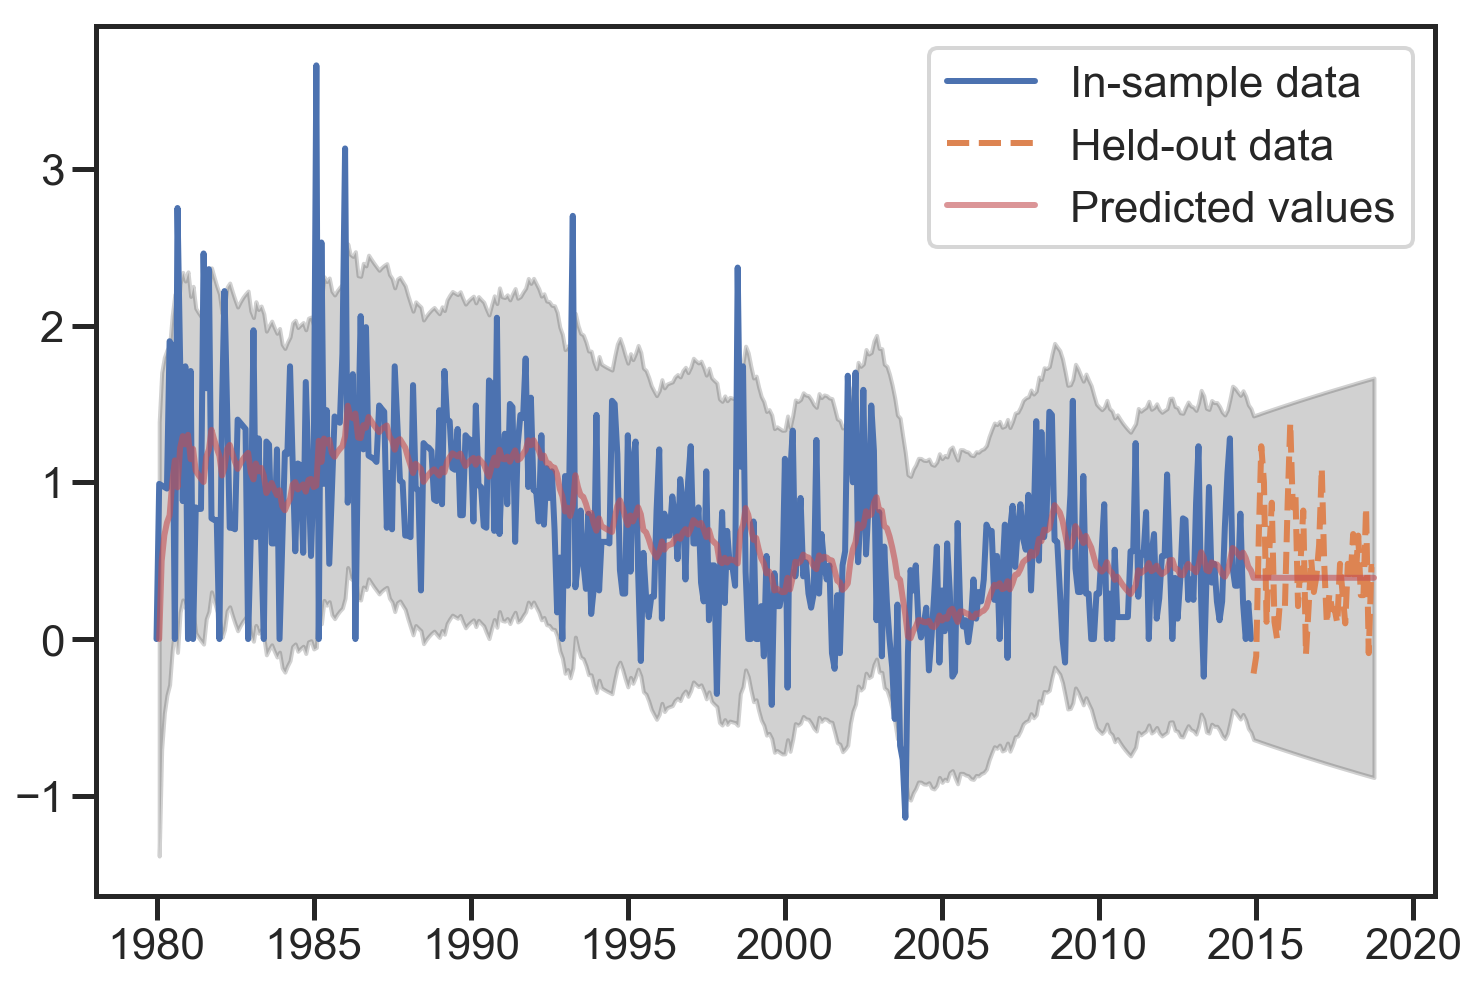

In [40]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
    
ax1.plot(X_train, label='In-sample data', linestyle='-')
# subtract 1 only to connect it to previous point in the graph
ax1.plot(X_test, label='Held-out data', linestyle='--')

# yes DatetimeIndex
pred_begin = X_train.index[model_results.loglikelihood_burn]
pred_end = X_test.index[-1]
pred = model_results.get_prediction(start=pred_begin.strftime('%Y-%m-%d'),
                                    end=pred_end.strftime('%Y-%m-%d'))
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int(alpha=0.05)

ax1.plot(pred_mean, 'r', alpha=.6, label='Predicted values')
ax1.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.2)

ax1.legend(loc='best');

In [41]:
def get_rmse(y, y_hat):
    '''Root Mean Square Error
    https://en.wikipedia.org/wiki/Root-mean-square_deviation
    '''
    mse = np.mean((y - y_hat)**2)
    return np.sqrt(mse)

def get_mape(y, y_hat):
    '''Mean Absolute Percent Error
    https://en.wikipedia.org/wiki/Mean_absolute_percentage_error
    '''
    perc_err = (100*(y - y_hat))/y
    return np.mean(abs(perc_err))

def get_mase(y, y_hat):
    '''Mean Absolute Scaled Error
    https://en.wikipedia.org/wiki/Mean_absolute_scaled_error
    '''
    abs_err = abs(y - y_hat)
    dsum=sum(abs(y[1:] - y_hat[1:]))
    t = len(y)
    denom = (1/(t - 1))* dsum
    return np.mean(abs_err/denom)

In [45]:
rmse = get_rmse(X_train, pred_mean[X_train.index])
print("RMSE: ", rmse)

mape = get_mape(X_train, pred_mean[X_train.index])
print("MAPE: ", mape)

mase = get_mase(X_train, pred_mean[X_train.index])
print("MASE: ", mase)

RMSE:  0.5289722159396163
MAPE:  inf
MASE:  1.0


In [47]:
rmse = get_rmse(X_test, pred_mean[X_test.index])
print(rmse)

mape = get_mape(X_test, pred_mean[X_test.index])
print(mape)

mase = get_mase(X_test, pred_mean[X_test.index])
print(mase)

0.362977258994469
inf
1.024883555355957
